<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/simpleNN_singleNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 2nd June, 2023
# Ref: https://www.kaggle.com/code/ryanholbrook/a-single-neuron

In [2]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Colab_data_files/deeplearning"

In [6]:
# 2.2 Full file path:
path = Path(pathToFolder) / "red_wine.csv"

In [7]:
# 3.0 Read data
red_wine = pd.read_csv(path)
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# 3.1
red_wine.shape   # (1599, 12)
red_wine.dtypes

(1599, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
# 3.2 Get target and predictors:
y = red_wine.pop("quality")
X = red_wine

In [11]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [12]:
# 4.1
model.add(layers.Input( shape = (11,) ) )

In [13]:
# 4.2
model.add(layers.Dense(1))

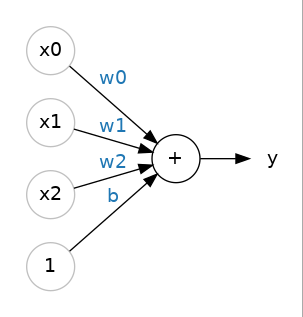

In [14]:
# 4.2.1
weights, bias = model.weights

In [15]:
# 4.2.2
weights

<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.5866691 ],
       [-0.45903563],
       [ 0.5772508 ],
       [ 0.36326593],
       [-0.13282526],
       [-0.5263878 ],
       [ 0.35348123],
       [-0.54950976],
       [-0.63847756],
       [-0.16803813],
       [ 0.33639795]], dtype=float32)>

In [16]:
# 4.2.3
bias

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [17]:
#4.3 Compile
model.compile( loss = "mae")

In [18]:
# 4.4 Train
model.fit(X,y, epochs = 100 )

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 6.7042
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 5.9951
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 5.3040
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 4.6559
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 4.0152
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 3.4140
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 2.8409
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 2.3562
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 1.9801
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 1.6964
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 1.4854
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2973
Epoch 13/100
50/50 [=================

In [19]:
# 5.0 Predict
pred = model.predict(X)

50/50 [==============================] - 0s 1ms/step


In [20]:
# 5.1 Round up decimal places
pred = np.round(pred)


In [ ]:
# 5.1.1
y.shape

(1599,)

In [ ]:
# 5.2 Compare:
np.sum(pred == y.values.reshape(1599,1))/1599

0.5828642901813633

In [ ]:
######### --------Done ---------------